In [53]:
import re
import glob
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.cbook
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

In [40]:
data = pd.read_csv('/mnt/Data/Data/PF/rgpf_SA_season/rgpf_2014_2021_summer.csv')
data

,lat,lon,NPIXELS_20DBZ,NPIXELS_30DBZ,NPIXELS_40DBZ,NPIXELS_50DBZ,NPIXELS_20MM,NPIXELS_30MM,NPIXELS_40MM,NPIXELS_50MM,...,MIN85PCT,NLT250,NLT225,N37LT250,N37LT225,MAXHT20,MAXHT30,MAXHT40,NSTRAT_KU,NCONV_KU
0,14.920553,-82.734344,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,287.109955,0.0,0.0,0.0,0.0,2.875,0.000,0.000,0.0,1.0
1,14.809609,-81.027560,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,282.770752,0.0,0.0,0.0,0.0,3.250,1.500,0.000,0.0,2.0
2,14.286827,-80.558685,49.0,26.0,3.0,0.0,0.0,0.0,0.0,0.0,...,264.541260,0.0,0.0,0.0,0.0,8.000,7.125,4.875,30.0,39.0
3,13.910675,-81.263054,27.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,...,259.803040,0.0,0.0,0.0,0.0,8.250,6.375,2.625,9.0,29.0
4,12.447679,-80.457310,288.0,122.0,12.0,0.0,1.0,0.0,0.0,0.0,...,257.963409,0.0,0.0,0.0,0.0,8.875,7.125,3.375,108.0,267.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650007,13.845942,-71.477130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,285.289978,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,1.0
650008,14.455017,-72.425964,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,282.926483,0.0,0.0,0.0,0.0,2.875,2.875,0.000,0.0,6.0
650009,14.396589,-72.042496,12.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,281.317627,0.0,0.0,0.0,0.0,3.625,2.875,2.000,0.0,15.0
650010,14.537724,-72.597115,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,285.821106,0.0,0.0,0.0,0.0,2.375,0.000,0.000,0.0,1.0


In [41]:
product = 'rgpf'
andes = list(shpreader.Reader('../mapping/andes_1000.shp').geometries())

Exporting figure as ../images/rgpf_maxht40.png


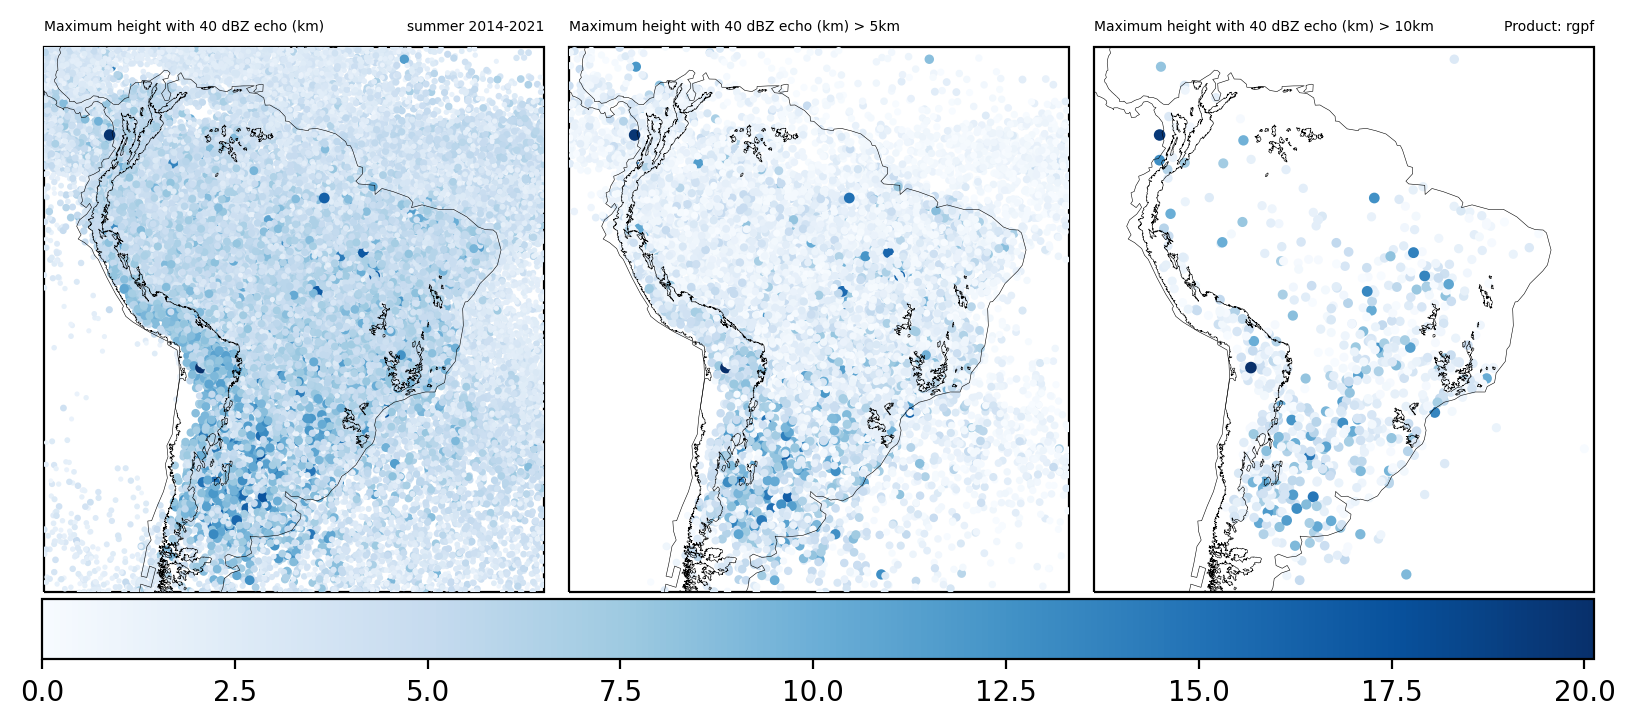

In [42]:
alt_ref = 5
alt_ref2 = 10

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r
cmap = plt.cm.Blues

ticks = np.arange(0,18,3)

fig = plt.figure(figsize=(10,6),dpi=200)
gs = gridspec.GridSpec(1,3)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.set_extent([-85,-30,-45,15],crs=proj)
a1 = ax1.scatter(data['lon'],data['lat'],c=data['MAXHT40'],cmap=cmap,s=data['MAXHT40']/2,zorder=3)
ax1.set_title('Maximum height with 40 dBZ echo (km)',fontsize=5,loc='left')
ax1.set_title('summer 2014-2021',fontsize=5,loc='right')

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.set_extent([-85,-30,-45,15],crs=proj)
ax1.scatter(data['lon'][data['MAXHT40']>alt_ref],data['lat'][data['MAXHT40']>alt_ref],c=data['MAXHT40'][data['MAXHT40']>alt_ref],
                cmap=cmap,s=data['MAXHT40'][data['MAXHT40']>alt_ref]/2,zorder=3)
ax1.set_title('Maximum height with 40 dBZ echo (km) > '+str(alt_ref)+'km',fontsize=5,loc='left')

ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.set_extent([-85,-30,-45,15],crs=proj)
ax1.scatter(data['lon'][data['MAXHT40']>alt_ref2],data['lat'][data['MAXHT40']>alt_ref2],c=data['MAXHT40'][data['MAXHT40']>alt_ref2],
                cmap=cmap,s=data['MAXHT40'][data['MAXHT40']>alt_ref2]/2,zorder=3)
ax1.set_title('Maximum height with 40 dBZ echo (km) > '+str(alt_ref2)+'km',fontsize=5,loc='left')
ax1.set_title('Product: '+product,fontsize=5,loc='right')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.05, wspace=0.05)

cbaxes = fig.add_axes([0.124, 0.22, 0.776, 0.05])
fig.colorbar(a1, cax = cbaxes,ticks=None,orientation="horizontal")

salida = '../images/'+product+'_maxht40.png'
print(f'Exporting figure as {salida}')
# plt.savefig(salida,facecolor='white',bbox_inches ='tight',pad_inches = 0.1)

In [43]:
data2 = data[(data['MAXHT40'] >= 10)]

In [44]:
data3 = data[(data['MAXHT40'] >= 10) & (data['MIN85PCT'] <= 250)]
data3 = data3.reset_index()

In [45]:
data4 = data[(data['MAXHT40'] >= 10) & (data['MIN85PCT'] <= 225)]
data4 = data4.reset_index()

Exporting figure as ../images/rgpf_maxht40.png


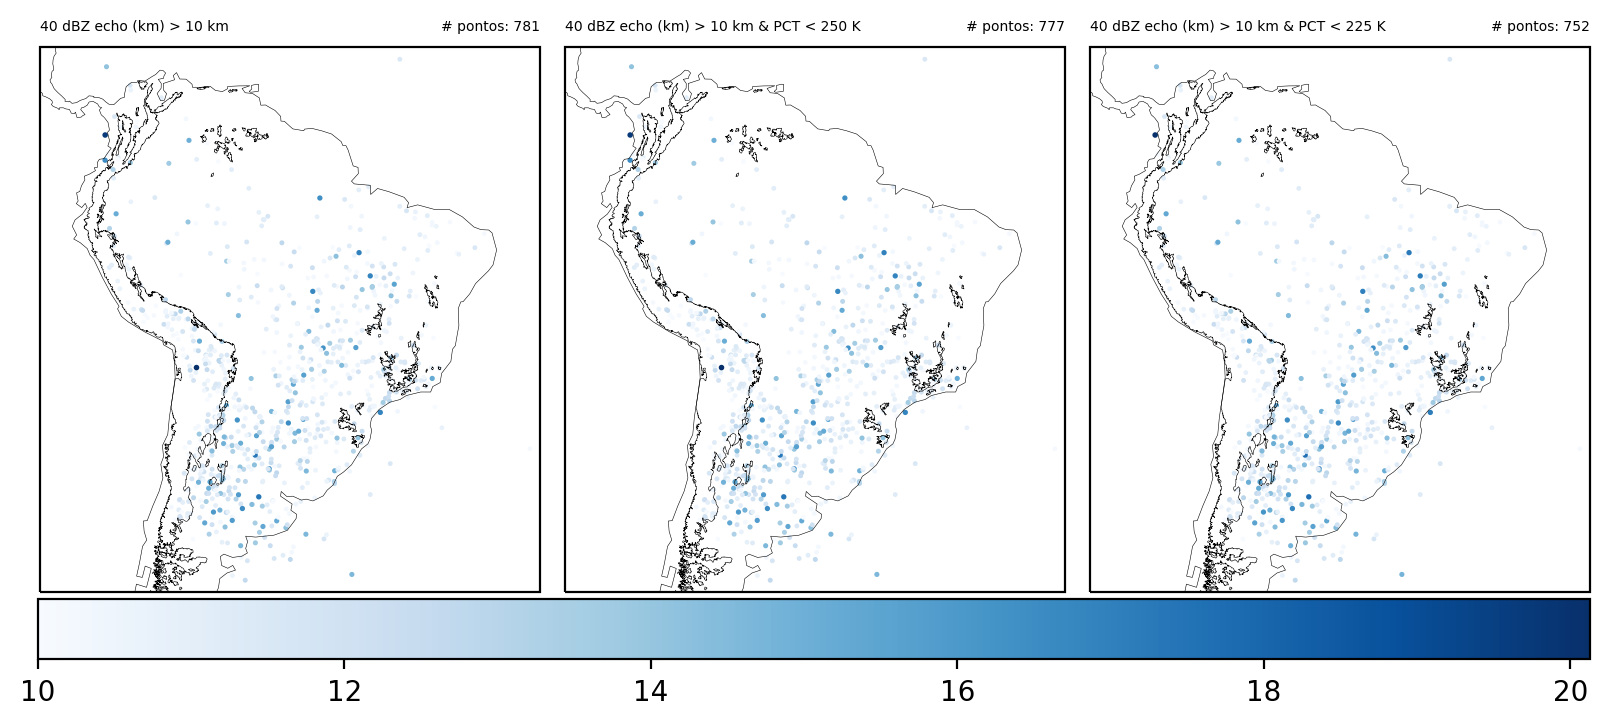

In [46]:
alt_ref2 = 10

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r
cmap = plt.cm.Blues

ticks = np.arange(0,18,3)

fig = plt.figure(figsize=(10,6),dpi=200)
gs = gridspec.GridSpec(1,3)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.set_extent([-85,-30,-45,15],crs=proj)
a1 = ax1.scatter(data2['lon'], data2['lat'], c=data2['MAXHT40'], cmap=cmap, s=data2['MAXHT40']/np.max(data2['MAXHT40']), zorder=3)
ax1.set_title('40 dBZ echo (km) > 10 km ',fontsize=5,loc='left')
ax1.set_title('# pontos: '+ str(len(data2['MAXHT40'])),fontsize=5,loc='right')

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.set_extent([-85,-30,-45,15],crs=proj)
ax1.scatter(data3['lon'], data3['lat'], c=data3['MAXHT40'], cmap=cmap, s=data3['MAXHT40']/np.max(data3['MAXHT40']), zorder=3)
ax1.set_title('40 dBZ echo (km) > 10 km & PCT < 250 K',fontsize=5,loc='left')
ax1.set_title('# pontos: '+ str(len(data3['MAXHT40'])),fontsize=5,loc='right')

ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.set_extent([-85,-30,-45,15],crs=proj)
ax1.scatter(data4['lon'], data4['lat'], c=data4['MAXHT40'], cmap=cmap, s=data4['MAXHT40']/np.max(data4['MAXHT40']), zorder=3)
ax1.set_title('40 dBZ echo (km) > 10 km & PCT < 225 K',fontsize=5,loc='left')
ax1.set_title('# pontos: '+ str(len(data4['MAXHT40'])),fontsize=5,loc='right')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.05, wspace=0.05)

cbaxes = fig.add_axes([0.124, 0.22, 0.776, 0.05])
fig.colorbar(a1, cax = cbaxes,ticks=None,orientation="horizontal")

salida = '../images/'+product+'_maxht40.png'
print(f'Exporting figure as {salida}')
# plt.savefig(salida,facecolor='white',bbox_inches ='tight',pad_inches = 0.1)

In [59]:
data5 = data[(data['MAXHT40'] >= 5) & (data['NSTRAT_KU'] > 1)]
data5 = data5.reset_index()

data6 = data[(data['MAXHT40'] >= 5) & (data['NCONV_KU'] > 1)]
data6 = data6.reset_index()

data7 = data[(data['MAXHT40'] >= 15) & (data['NCONV_KU'] > 1)]
data7 = data7.reset_index()

Exporting figure as ../images/rgpf_maxht40.png


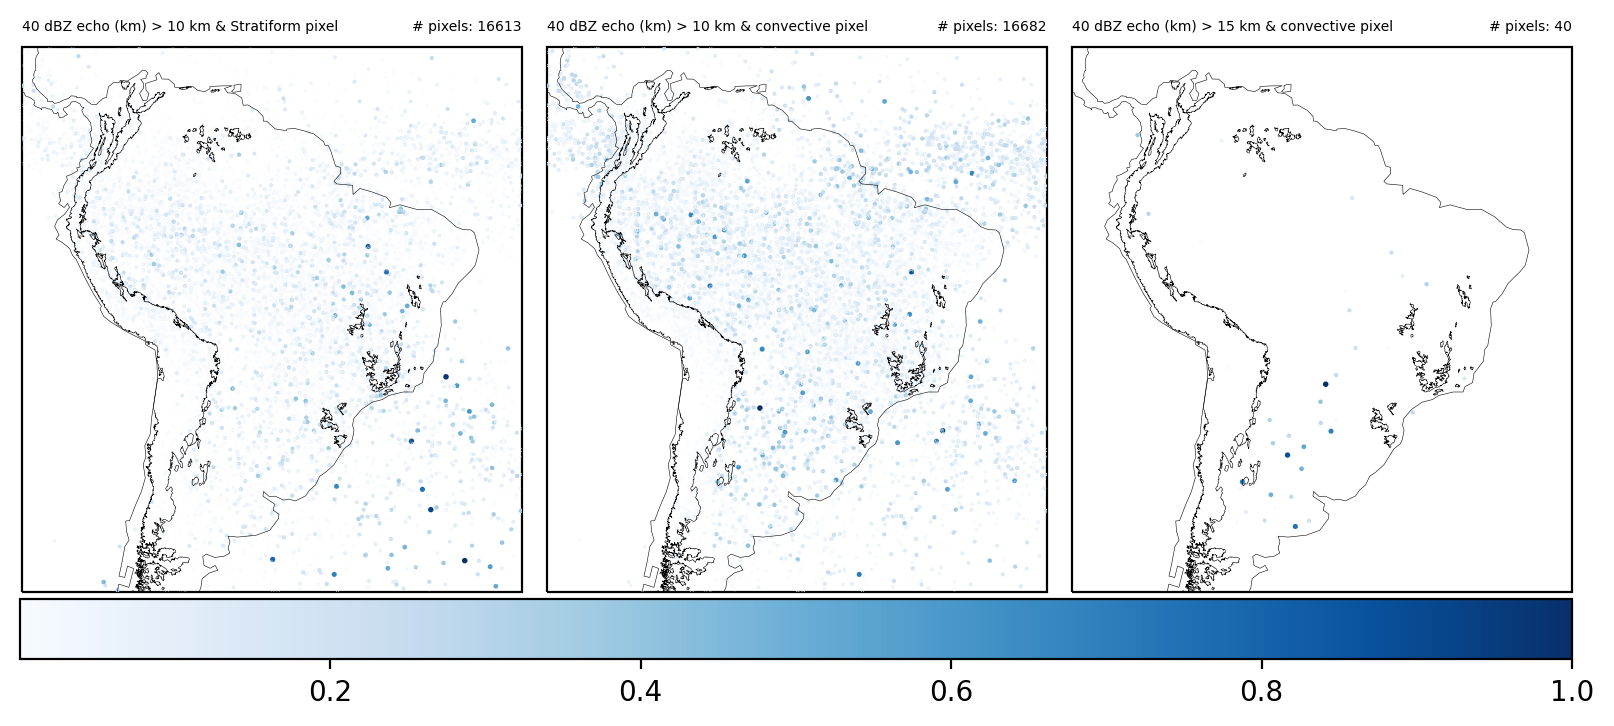

In [48]:
alt_ref2 = 10

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r
cmap = plt.cm.Blues

ticks = np.arange(0,18,3)

fig = plt.figure(figsize=(10,6),dpi=200)
gs = gridspec.GridSpec(1,3)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.set_extent([-85,-30,-45,15],crs=proj)
a1 = ax1.scatter(data5['lon'], data5['lat'], c=data5['NSTRAT_KU']/np.max(data5['NSTRAT_KU']), cmap=cmap, s=data5['NSTRAT_KU']/np.max(data5['NSTRAT_KU']), zorder=3)
ax1.set_title('40 dBZ echo (km) > 10 km & Stratiform pixel ',fontsize=5,loc='left')
ax1.set_title('# pixels: '+ str(len(data5)),fontsize=5,loc='right')

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.set_extent([-85,-30,-45,15],crs=proj)
ax1.scatter(data6['lon'], data6['lat'], c=data6['NCONV_KU']/np.max(data6['NCONV_KU']), cmap=cmap, s=data6['NCONV_KU']/np.max(data6['NCONV_KU']), zorder=3)
ax1.set_title('40 dBZ echo (km) > 10 km & convective pixel',fontsize=5,loc='left')
ax1.set_title('# pixels: '+ str(len(data6)),fontsize=5,loc='right')

ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.set_extent([-85,-30,-45,15],crs=proj)
ax1.scatter(data7['lon'], data7['lat'], c=data7['NCONV_KU']/np.max(data7['NCONV_KU']), cmap=cmap, s=data7['NCONV_KU']/np.max(data7['NCONV_KU']), zorder=3)
ax1.set_title('40 dBZ echo (km) > 15 km & convective pixel',fontsize=5,loc='left')
ax1.set_title('# pixels: '+ str(len(data7)),fontsize=5,loc='right')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.05, wspace=0.05)

cbaxes = fig.add_axes([0.124, 0.22, 0.776, 0.05])
fig.colorbar(a1, cax = cbaxes,ticks=None,orientation="horizontal")

salida = '../images/'+product+'_maxht40.png'
print(f'Exporting figure as {salida}')
# plt.savefig(salida,facecolor='white',bbox_inches ='tight',pad_inches = 0.1)